# GRIP @ The Sparks Foundation
## **Data Science and Business Analytics**

# Task -2

# Name : **Pratik Dhumal**

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/pratikd2124/csv/master/Iris.csv")
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
x = iris_df.iloc[:,[1,2,3,4]].values

# The elbow method 

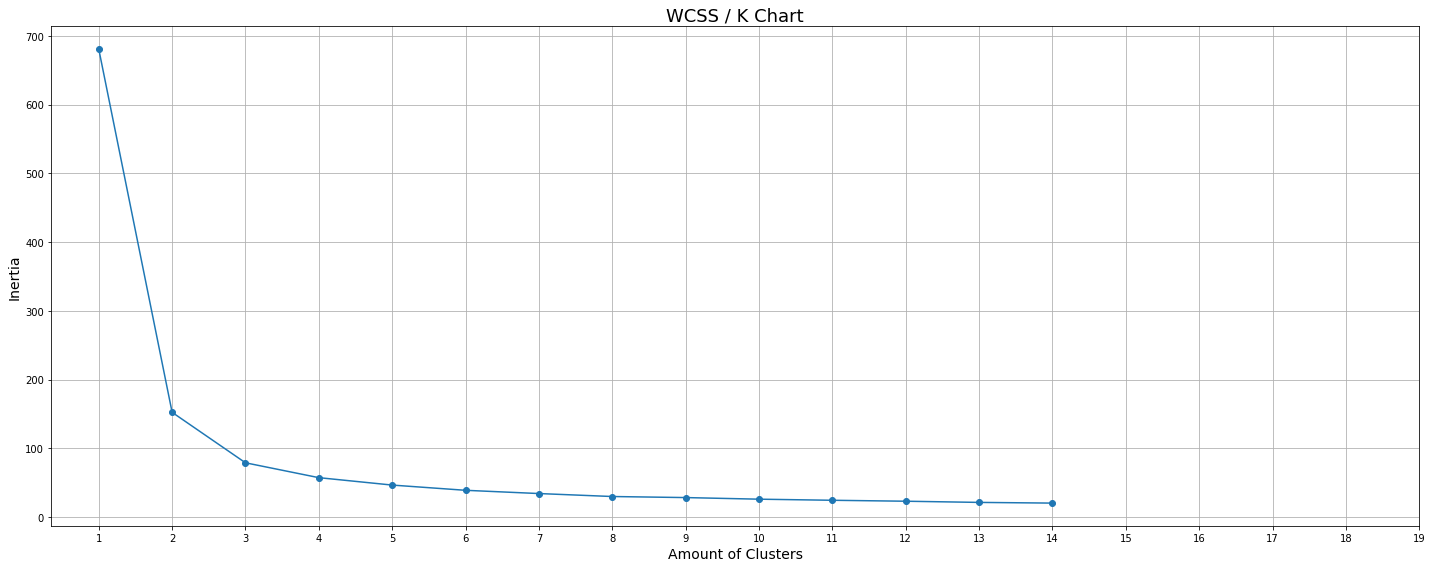

In [12]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

## Applying K-MEANS CLUSTERING

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 0)
pred_kmeans = kmeans.fit_predict(x)
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Clustered scatter plot')

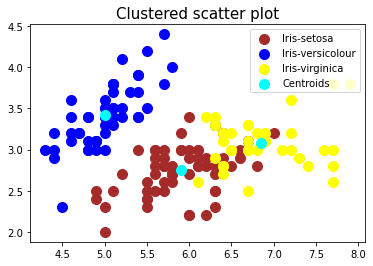

In [20]:
# Visualising the clusters - On the first two columns
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 1],s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

plt.legend(loc='upper right')
plt.title('Clustered scatter plot',size = 15)